# Boston House Price Prediction

**Dataset Information**

Boston House Prices Dataset was collected in 1978 and has 506 entries with 14 attributes or features for homes from various suburbs in Boston.


* Boston Housing Dataset Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [52]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/ML Datasets/Regression/Boston Dataset.csv')
df.drop(columns=['Unnamed: 0'],axis=0,inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [55]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Preprocessing the dataset

In [56]:
df.shape

(506, 14)

In [57]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

## EDA

In [58]:
arr = df.columns.values
arr

array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'], dtype=object)

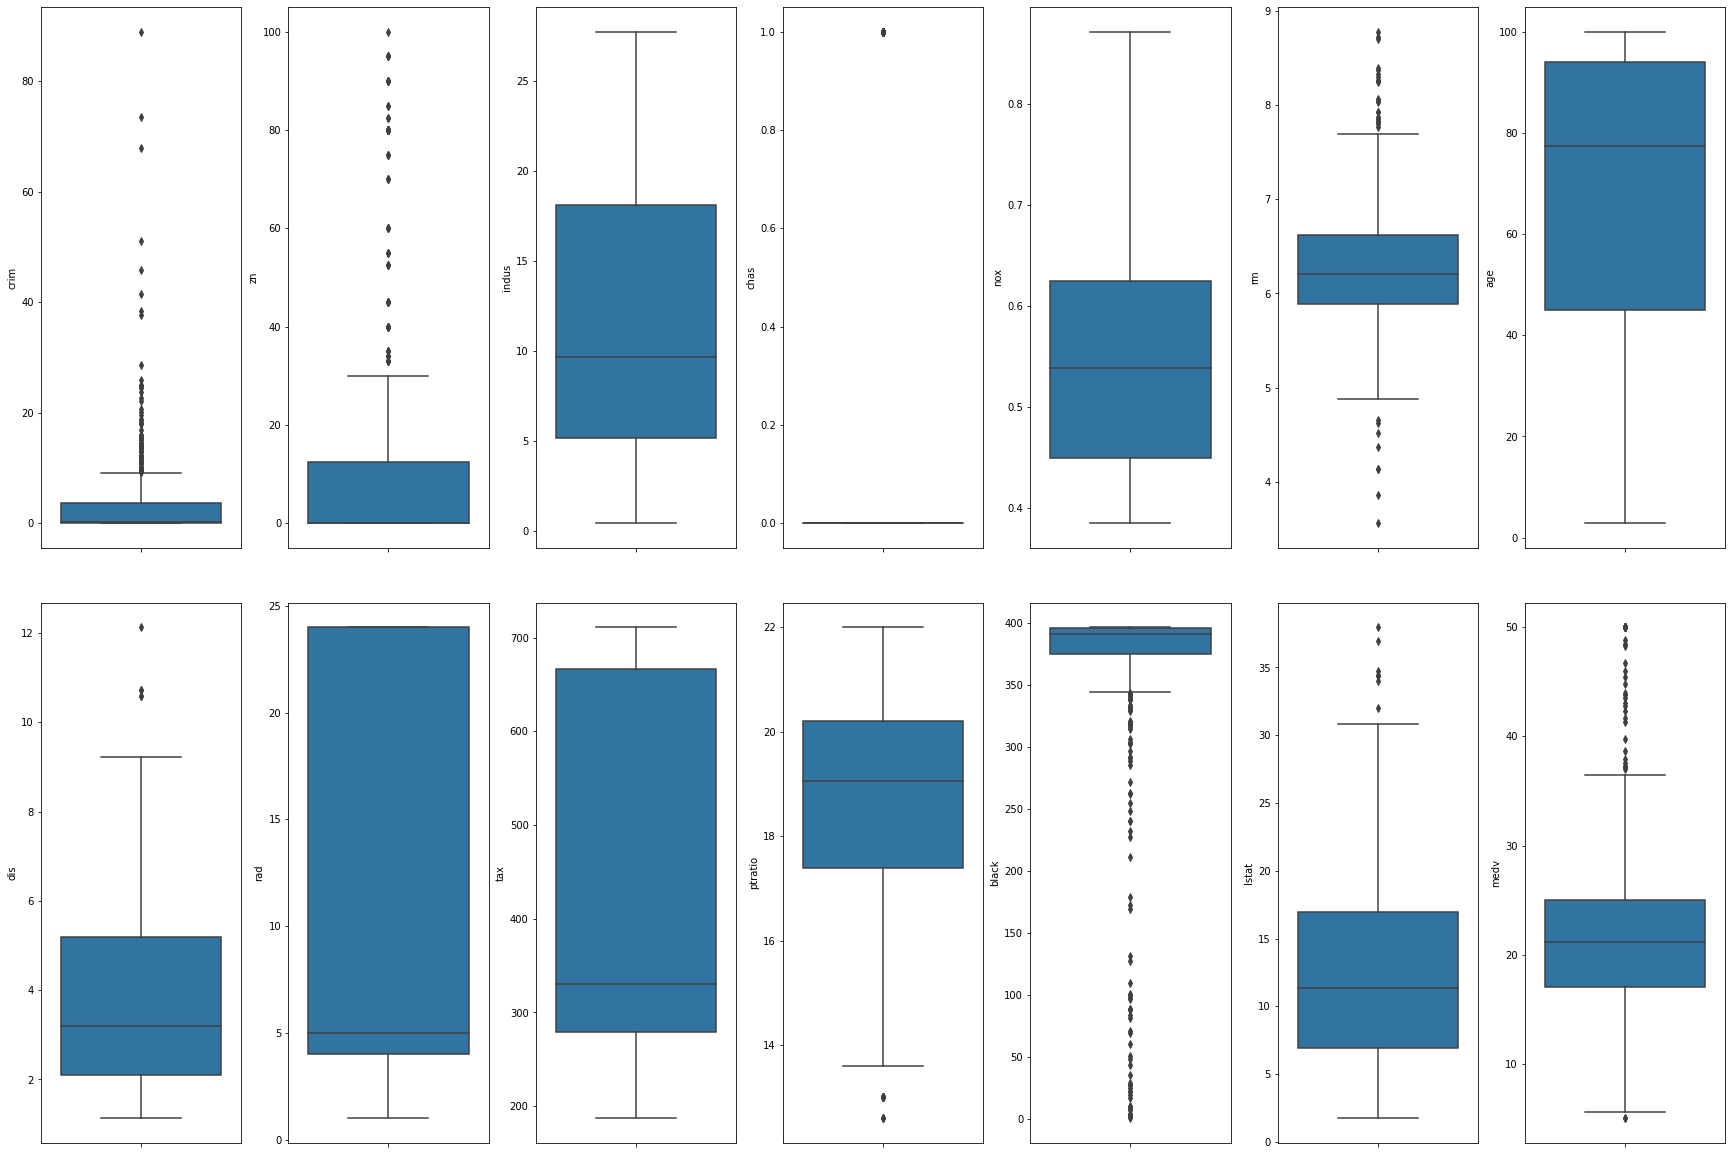

In [59]:
fig,ax = plt.subplots(ncols=df.shape[1]//2,nrows=2,figsize=(24,16))
for i in range(df.shape[1]) :
  sns.boxplot(y=arr[i],data=df,ax=ax[i//7,i%7])
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5)

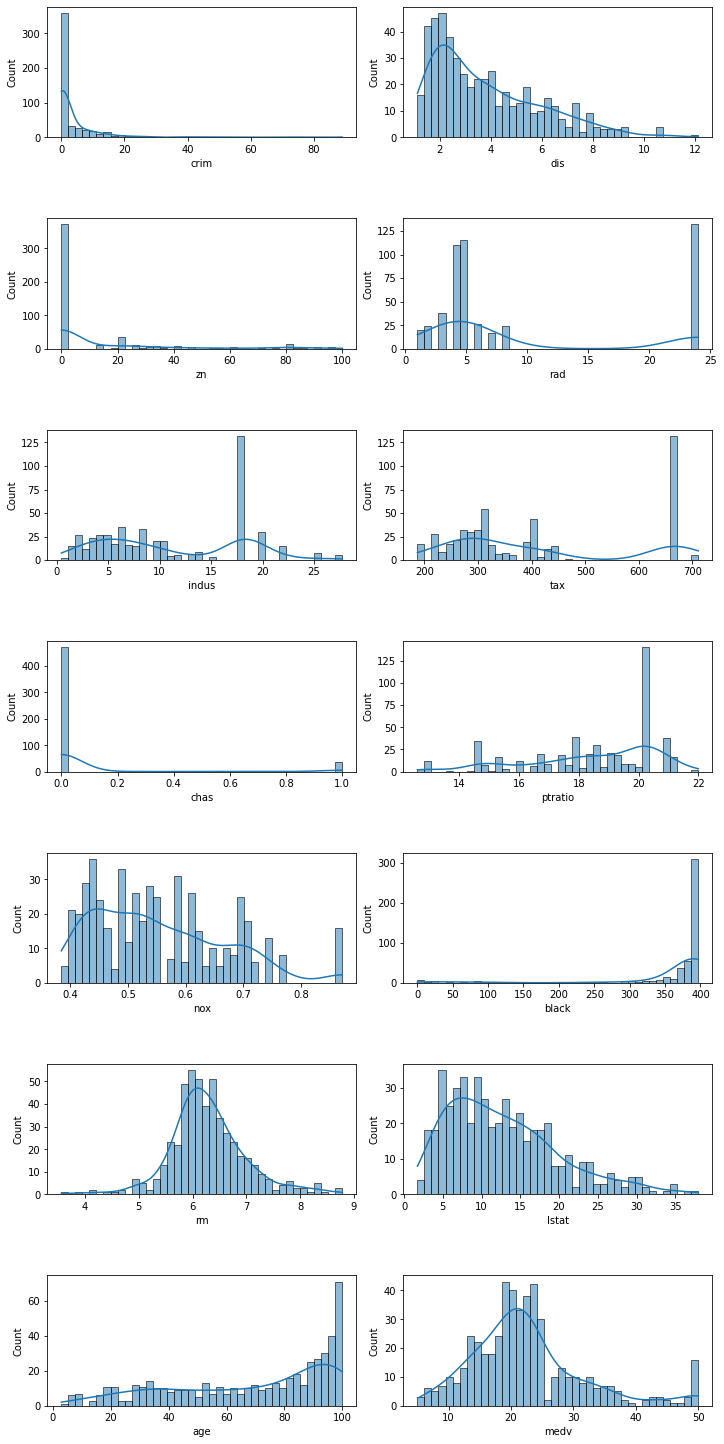

In [60]:
fig,ax = plt.subplots(nrows=df.shape[1]//2,ncols=2,figsize=(10,20))
for i in range(df.shape[1]) :
  sns.histplot(x=arr[i],data=df,ax=ax[i%7,i//7],kde=True,bins=40)
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5)
plt.show()

In [65]:
# Min Max Normalization
cols = ['crim','zn','tax','black']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[cols])
df[cols] = scaler.transform(df[cols])
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.18,2.31,0,0.538,6.575,65.2,4.0900,1,0.208015,15.3,1.000000,4.98,24.0
1,0.000236,0.00,7.07,0,0.469,6.421,78.9,4.9671,2,0.104962,17.8,1.000000,9.14,21.6
2,0.000236,0.00,7.07,0,0.469,7.185,61.1,4.9671,2,0.104962,17.8,0.989737,4.03,34.7
3,0.000293,0.00,2.18,0,0.458,6.998,45.8,6.0622,3,0.066794,18.7,0.994276,2.94,33.4
4,0.000705,0.00,2.18,0,0.458,7.147,54.2,6.0622,3,0.066794,18.7,1.000000,5.33,36.2


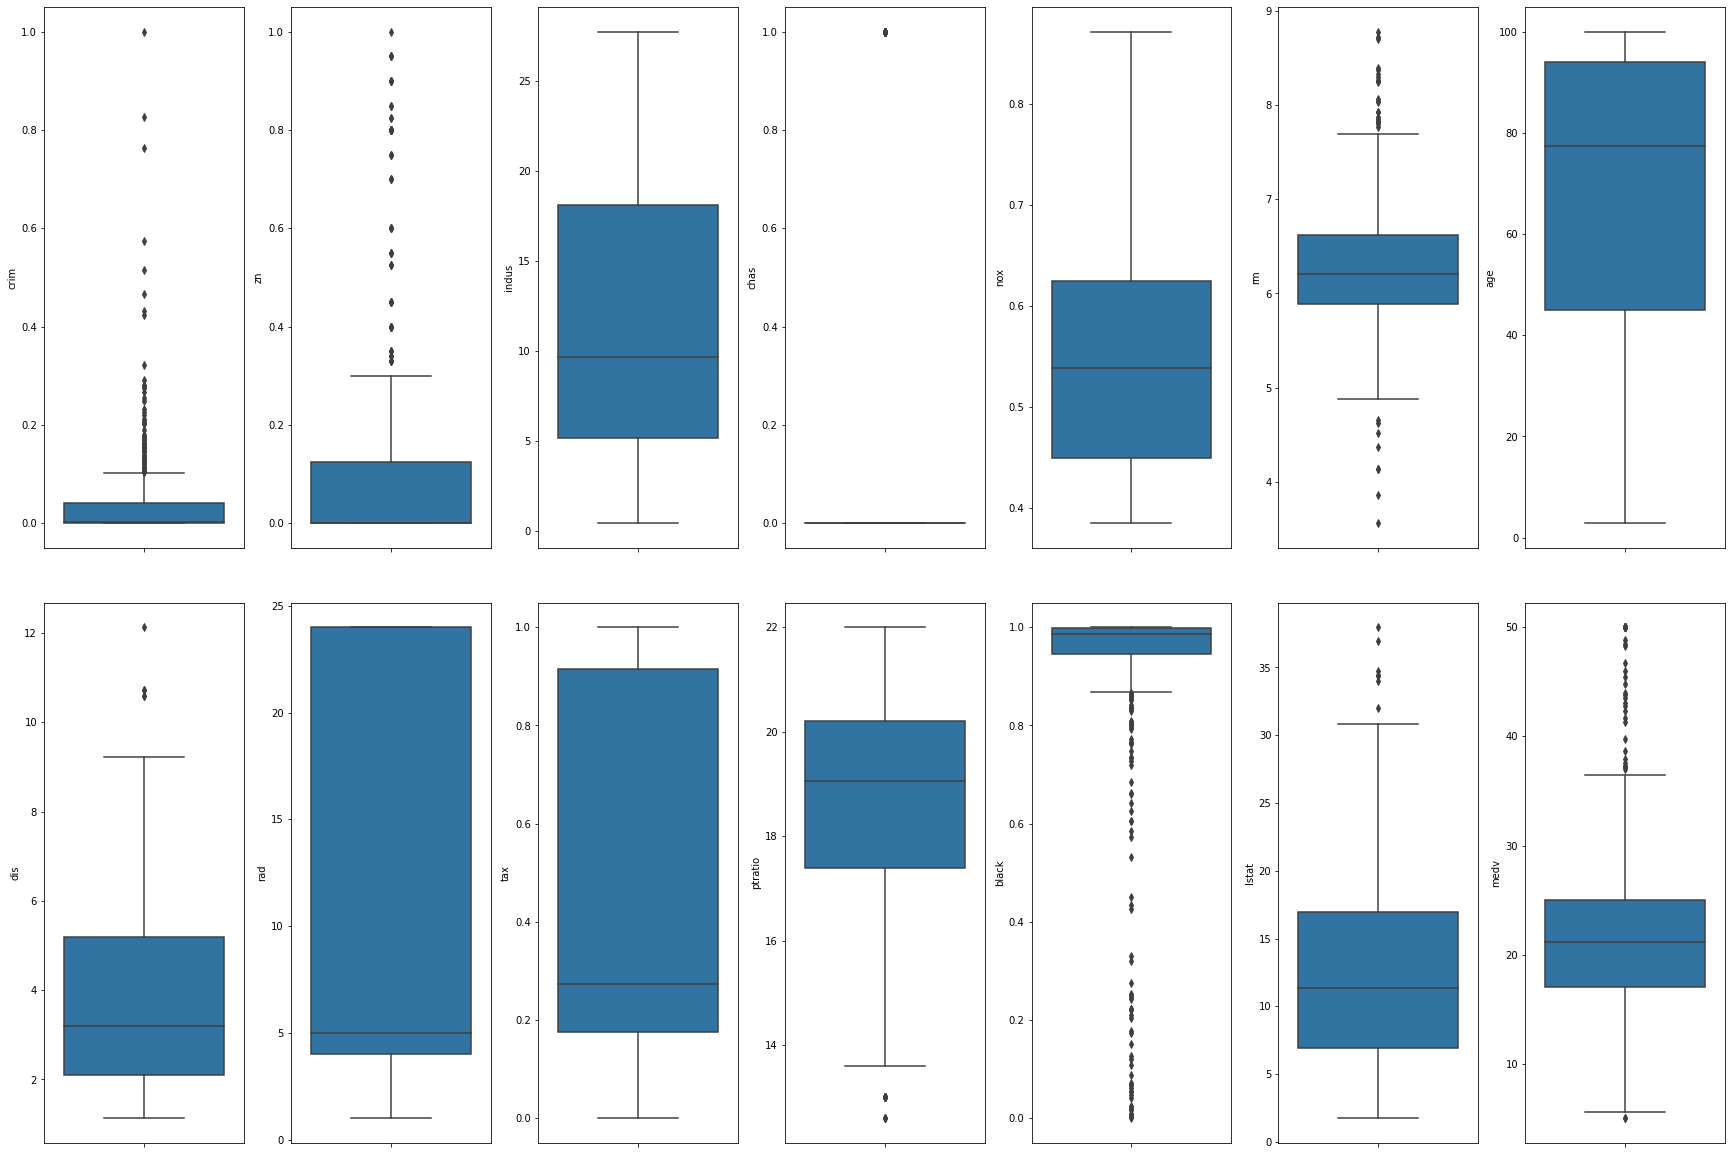

In [66]:
fig,ax = plt.subplots(ncols=df.shape[1]//2,nrows=2,figsize=(24,16))
for i in range(df.shape[1]) :
  sns.boxplot(y=arr[i],data=df,ax=ax[i//7,i%7])
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5)

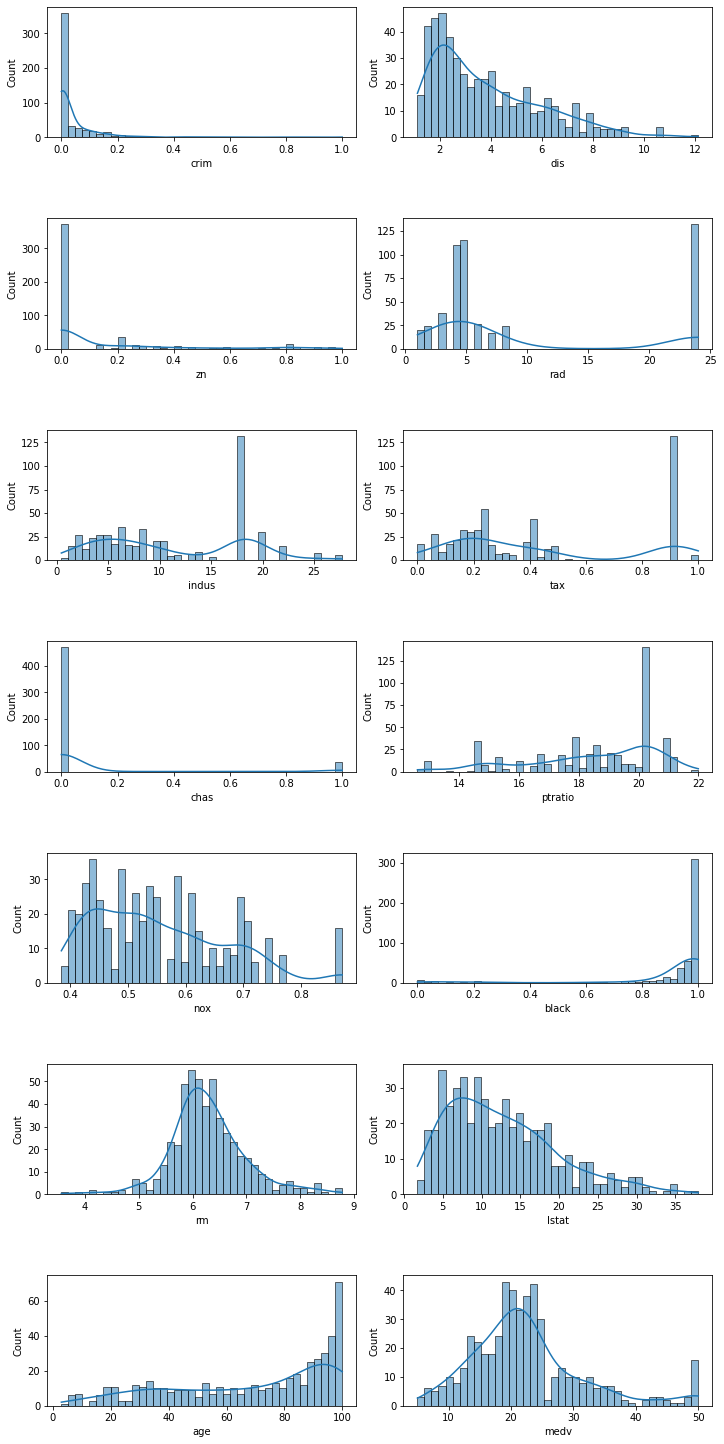

In [67]:
fig,ax = plt.subplots(nrows=df.shape[1]//2,ncols=2,figsize=(10,20))
for i in range(df.shape[1]) :
  sns.histplot(x=arr[i],data=df,ax=ax[i%7,i//7],kde=True,bins=40)
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5)
plt.show()

In [72]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[cols] = scaler.fit_transform(df[cols])
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.419782,0.284830,2.31,0,0.538,6.575,65.2,4.0900,1,-0.666608,15.3,0.441052,4.98,24.0
1,-0.417339,-0.487722,7.07,0,0.469,6.421,78.9,4.9671,2,-0.987329,17.8,0.441052,9.14,21.6
2,-0.417342,-0.487722,7.07,0,0.469,7.185,61.1,4.9671,2,-0.987329,17.8,0.396427,4.03,34.7
3,-0.416750,-0.487722,2.18,0,0.458,6.998,45.8,6.0622,3,-1.106115,18.7,0.416163,2.94,33.4
4,-0.412482,-0.487722,2.18,0,0.458,7.147,54.2,6.0622,3,-1.106115,18.7,0.441052,5.33,36.2


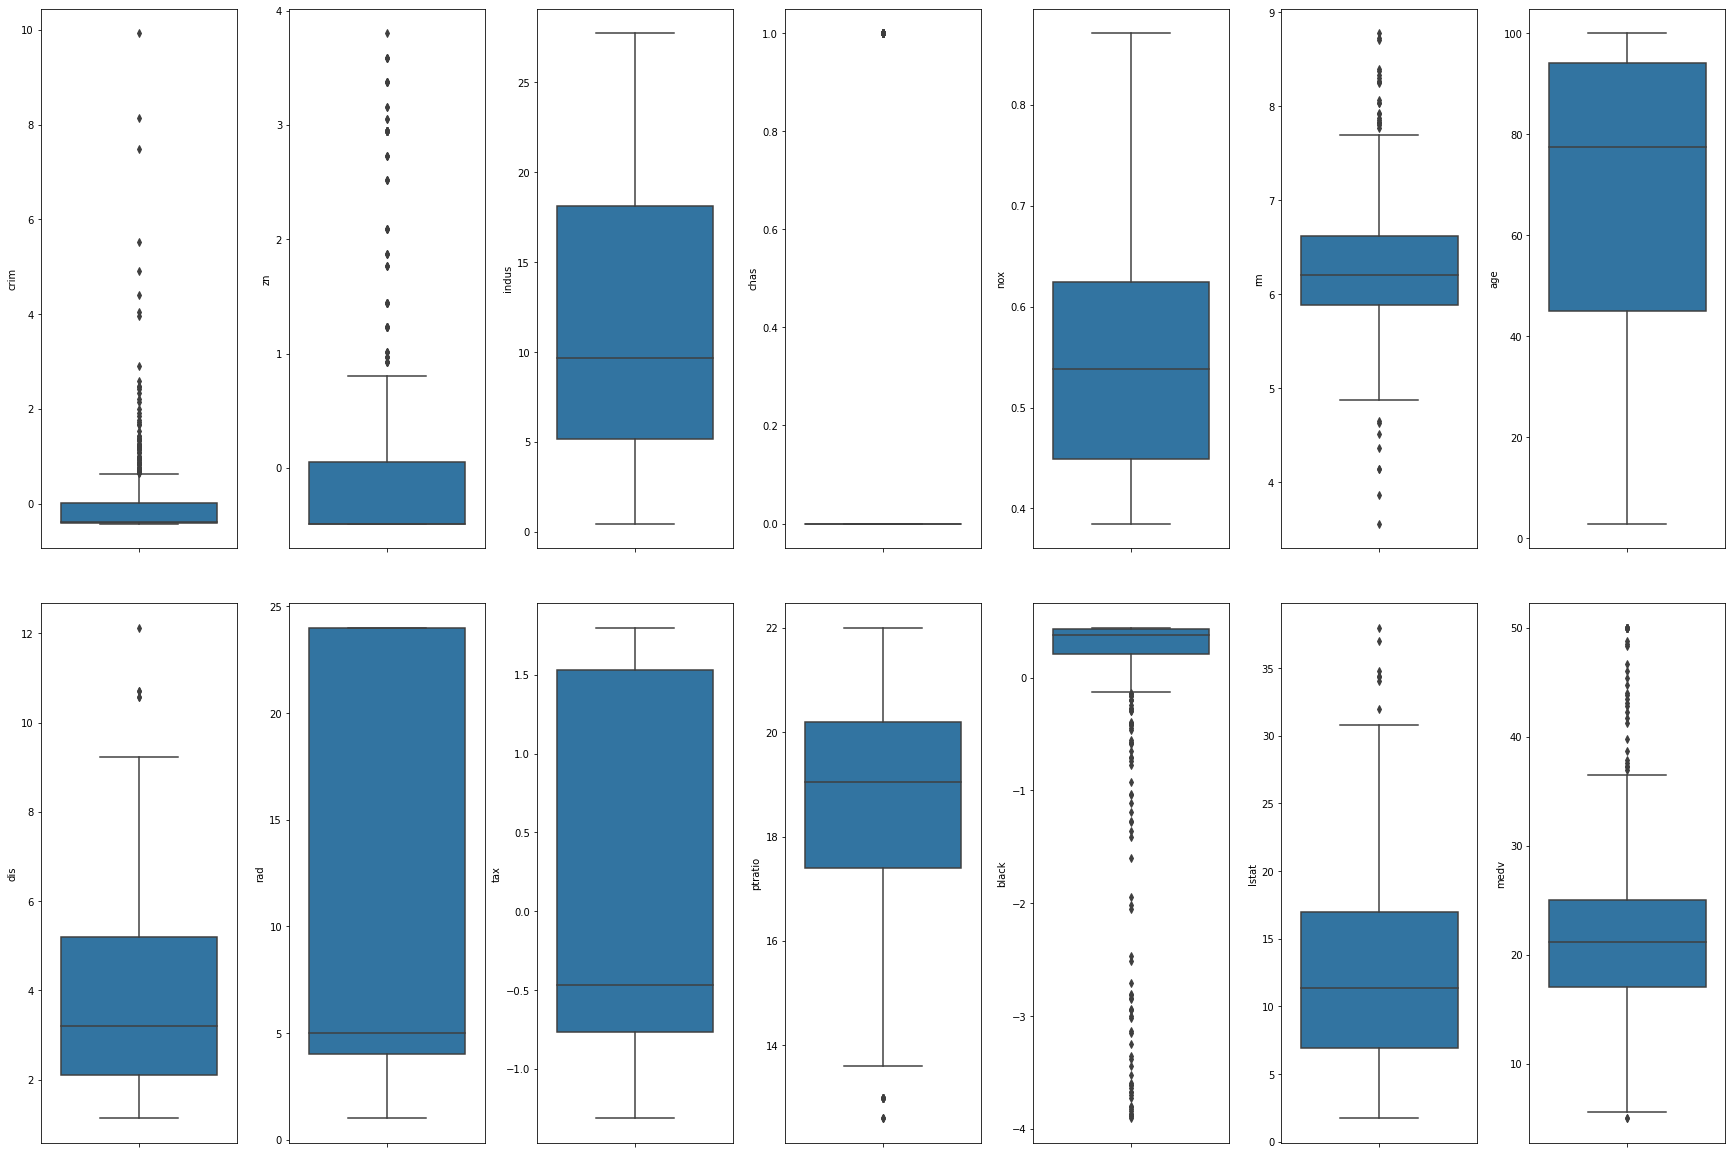

In [73]:
fig,ax = plt.subplots(ncols=df.shape[1]//2,nrows=2,figsize=(24,16))
for i in range(df.shape[1]) :
  sns.boxplot(y=arr[i],data=df,ax=ax[i//7,i%7])
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5)

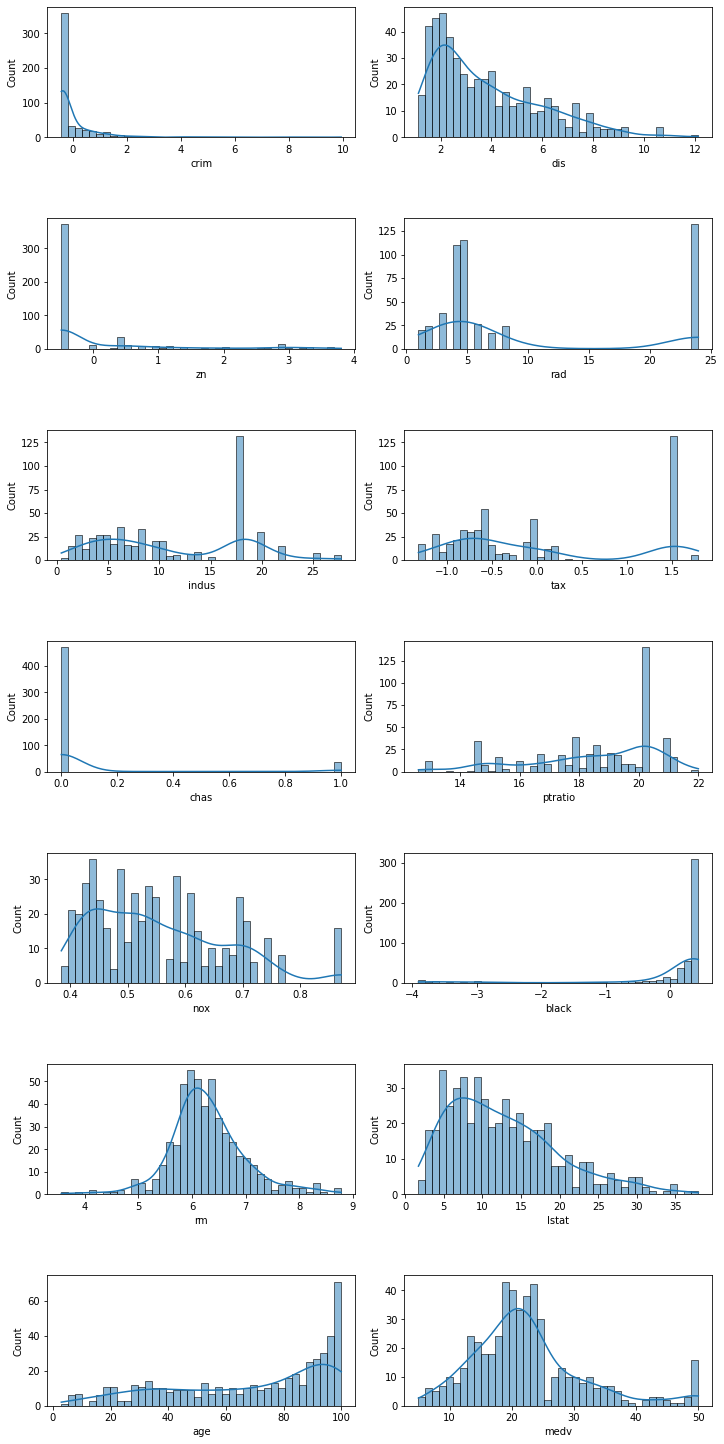

In [74]:
fig,ax = plt.subplots(nrows=df.shape[1]//2,ncols=2,figsize=(10,20))
for i in range(df.shape[1]) :
  sns.histplot(x=arr[i],data=df,ax=ax[i%7,i//7],kde=True,bins=40)
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5)
plt.show()

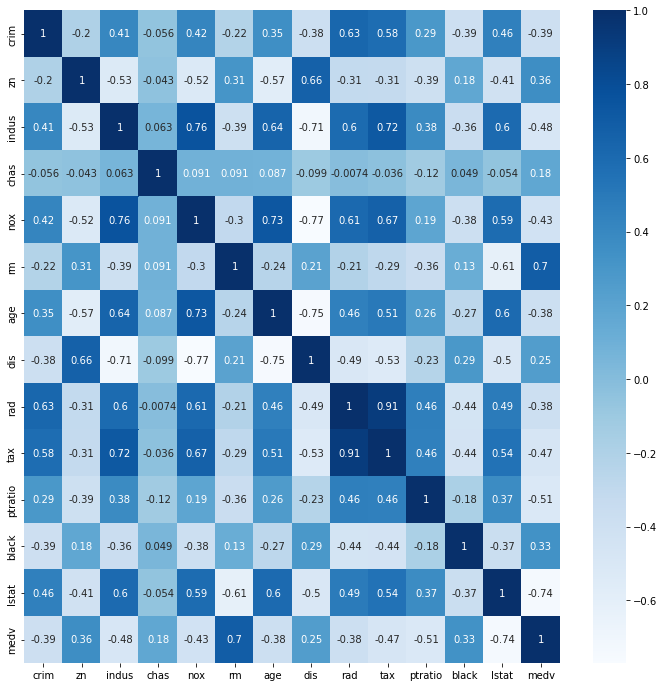

In [76]:
# Correlation Matrix
corr_mat = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_mat,annot=True,cmap='Blues')

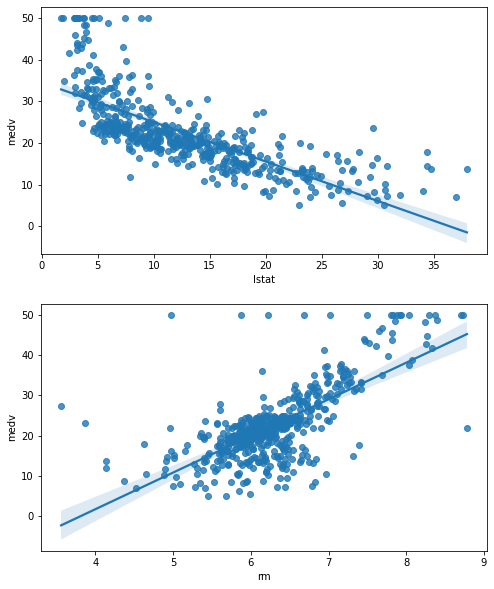

In [86]:
cols = ['lstat','rm']
fig,ax = plt.subplots(nrows=len(cols),figsize=(8,10))
for i,col in enumerate(cols) :
  sns.regplot(x=col,y='medv',data=df,ax=ax[i])

## Splitting Data

In [87]:
x = df.drop(columns=['medv','rad'],axis=1)
y = df['medv']
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat
0,-0.419782,0.284830,2.31,0,0.538,6.575,65.2,4.0900,-0.666608,15.3,0.441052,4.98
1,-0.417339,-0.487722,7.07,0,0.469,6.421,78.9,4.9671,-0.987329,17.8,0.441052,9.14
2,-0.417342,-0.487722,7.07,0,0.469,7.185,61.1,4.9671,-0.987329,17.8,0.396427,4.03
3,-0.416750,-0.487722,2.18,0,0.458,6.998,45.8,6.0622,-1.106115,18.7,0.416163,2.94
4,-0.412482,-0.487722,2.18,0,0.458,7.147,54.2,6.0622,-1.106115,18.7,0.441052,5.33


In [88]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

## Model Selection

In [108]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error


def train(model_name,model,x,y) :
  x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  cv_score = cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=5)
  cv_score = np.abs(np.mean(cv_score))
  
  print(f"Model Report :" )
  print(f"MSE : {mean_squared_error(y_test,pred)}")
  print(f"CV Score",cv_score)
  print(f"Training Score : {model.score(x_train,y_train)*100}")
  print(f"Testing Score : {model.score(x_test,y_test)*100}")
  coef = pd.Series(model_lr.coef_,x.columns).sort_values()
  plt.figure(figsize=(6,6))
  coef.plot(kind='bar',title=f'{model_name} Model Coefs')
  plt.show()

Model Report :
MSE : 31.77772071895051
CV Score 35.58136621076921
Training Score : 76.28972435906698
Testing Score : 61.103912270455595


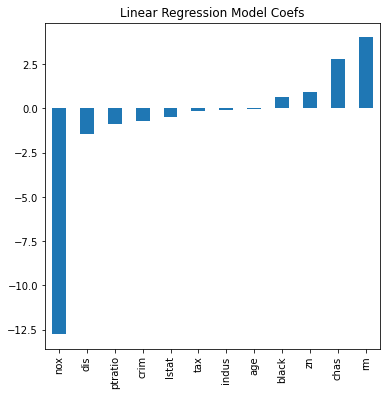

Model Report :
MSE : 30.881181102362202
CV Score 40.40965191225005
Training Score : 100.0
Testing Score : 62.2012812066435


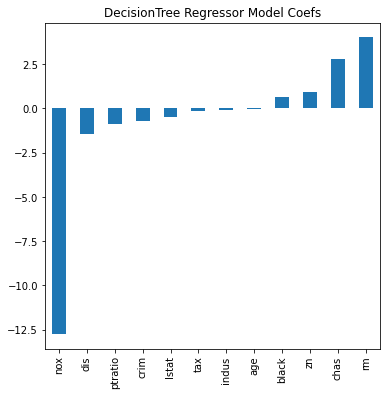

Model Report :
MSE : 16.508481960629926
CV Score 21.913076454125402
Training Score : 98.27562368230141
Testing Score : 79.79353622302622


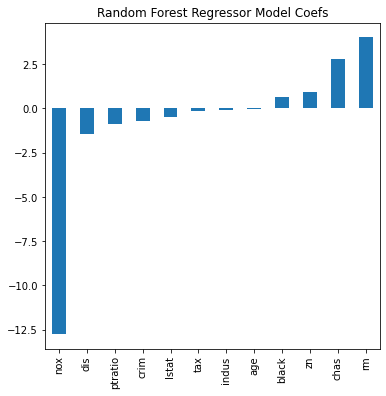

Model Report :
MSE : 20.038106732283463
CV Score 19.469033908736147
Training Score : 100.0
Testing Score : 75.47325800090887


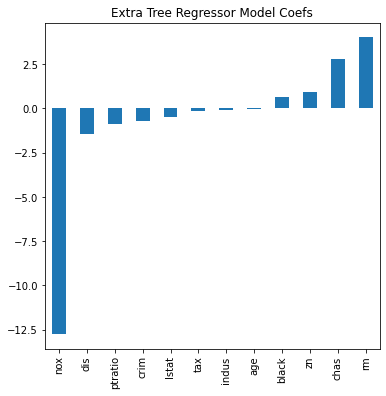

[19:09:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:09:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:09:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:09:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:09:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:09:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Report :
MSE : 18.713272720530053
CV Score 17.971291041858336
Training Score : 98.08011452338096
Testing Score : 77.09486140047285


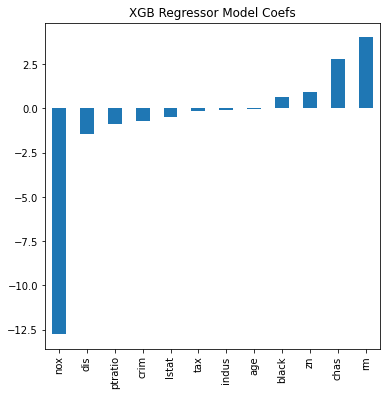

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
import xgboost as xgb
model_lr = LinearRegression(normalize=True)
model_tree = DecisionTreeRegressor()
model_rfg = RandomForestRegressor()
model_xtree = ExtraTreesRegressor()
model_xgb = xgb.XGBRegressor()
train("Linear Regression",model_lr,x,y)
train("DecisionTree Regressor",model_tree,x,y)
train("Random Forest Regressor",model_rfg,x,y)
train("Extra Tree Regressor",model_xtree,x,y)
train("XGB Regressor",model_xgb,x,y)